In [1]:
!pip install librosa

In [2]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 00C6-083E

 Directory of C:\Users\OVAK\Desktop

10/06/2022  07:09 PM    <DIR>          .
10/06/2022  07:09 PM    <DIR>          ..
10/06/2022  02:31 PM    <DIR>          .ipynb_checkpoints
09/18/2022  02:22 PM            15,859 Adas weekly schedule.xlsx
10/01/2022  11:25 PM    <DIR>          App
10/02/2022  12:38 PM         1,036,574 Audio Classification EDA.ipynb
10/06/2022  01:21 PM            17,044 Audio CNN.ipynb
09/28/2022  08:41 PM    <DIR>          first_repo
10/04/2022  09:09 PM    <DIR>          Lite
10/06/2022  06:57 PM            71,675 Model Hazirlanmasi ve Egitimi - Notebook.ipynb
10/02/2022  10:59 AM                65 Preprocessing.py
10/06/2022  02:31 PM           233,138 second_part - Copy.ipynb
10/04/2022  10:05 PM           233,060 second_part.ipynb
08/29/2022  05:03 PM            69,229 Transcript.pdf
10/04/2022  07:09 PM    <DIR>          UrbanSound8K
09/29/2022  09:08 PM            93,566 yok-ogrenci-belges

In [3]:
import IPython.display as ipd
import pandas as pd
import numpy as np
import os
import cv2
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
def create_spectrogram(y):
    spec=librosa.feature.melspectrogram(y=y)
    spec.shape
    spec_conv=librosa.amplitude_to_db(spec,ref=np.max)
    return spec_conv

array([[-59.471214, -56.774467, -56.82785 , ..., -67.6951  , -55.542343,
        -52.186203],
       [-44.100563, -39.206604, -49.891037, ..., -45.58976 , -46.29477 ,
        -44.788055],
       [-43.909996, -44.88091 , -40.58925 , ..., -28.950697, -34.68531 ,
        -43.9439  ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

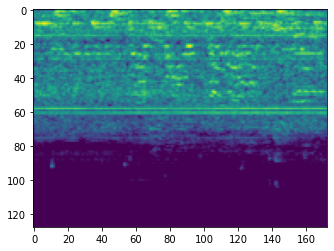

In [ ]:
a=create_spectrogram(scale)
plt.imshow(a)
a

In [5]:
import matplotlib.image

In [6]:
!pip3 install opencv-python

In [7]:
image = cv2.imread('UrbanSound8K/spectrograms/0/13230-0-0-1.png')
type(image)
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  3,   0,   0],
        [  3,   0,   0],
        [  3,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

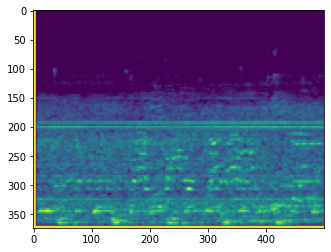

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
image

In [9]:
img_arr=cv2.resize(image,(224,224))
img_arr

array([[255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       ...,
       [255, 255,  74, ...,  78,  78,  78],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [10]:
folder_path="UrbanSound8K/audio/"
new_image_path="Lite/Images/"

In [11]:
metadata=pd.read_csv('Lite/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
from tqdm import tqdm

In [51]:
extracted_features=[]
X_array=[]
Y_array=[]
for index_num,row in tqdm(metadata.iterrows()):
    #audio_path = os.path.join(folder_path,'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["classID"]
    
    
    ## We have already saved those images, thus we don't have to do it this part again
    #scale, sr=librosa.load(audio_path)
    #image_spec=create_spectrogram(scale)
    #(DRIVE)image_path = os.path.join(drive_path+"Images/",'Fold'+str(row["fold"])+'/',(str(row["slice_file_name"])).replace("wav","png"))
    image_path = os.path.join(new_image_path,'fold'+str(row["fold"])+'/',(str(row["slice_file_name"])).replace("wav","png"))
    #matplotlib.image.imsave(image_path, image_spec)
    img_arr=cv2.imread(image_path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    img_arr=cv2.resize(img_arr,(224,224))

    
    extracted_features.append([img_arr,final_class_labels])
    X_array.append([img_arr])
    Y_array.append([final_class_labels])

8732it [00:25, 345.46it/s]


In [53]:
Y_array

[[3],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [3],
 [3],
 [3],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [3],
 [3],
 [3],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [9],
 [9],
 [9],
 [9],
 [9],
 [9],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [6],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8]

In [54]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','classID'])
extracted_features_df.head()

,feature,classID
0,"[[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, ...",3
1,"[[132, 155, 158, 143, 133, 175, 195, 197, 186,...",2
2,"[[100, 120, 144, 160, 151, 163, 164, 156, 144,...",2
3,"[[121, 122, 114, 105, 109, 102, 102, 107, 111,...",2
4,"[[157, 169, 171, 163, 160, 164, 160, 158, 164,...",2


In [55]:
### attempt_1: distrubte the data first

"""
x_train=[]
for i in range (0,8):
    train_path=folder_path+str(i)
    for img in os.listdir(train_path):

        image_path=train_path+"/"+img

        img_arr=cv2.imread(image_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
        
        
x_train[10]"""
"""x_test=[]

for i in range (8,9):
    test_path=folder_path+str(i)
    for img in os.listdir(test_path):

        image_path=test_path+"/"+img

        img_arr=cv2.imread(image_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)"""
"""x_val=[]

for i in range (9,10):
    val_path=folder_path+str(i)
    for img in os.listdir(val_path):

        image_path=val_path+"/"+img

        img_arr=cv2.imread(image_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)"""
"""train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)"""
"""train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0"""

'train_x=train_x/255.0\ntest_x=test_x/255.0\nval_x=val_x/255.0'

In [61]:
np.save('file_name', extracted_features)

C:\Users\OVAK\anaconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
